In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
train = pd.read_csv('TrainClean.csv', index_col=0)
test = pd.read_csv('TestClean.csv', index_col=0)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [3]:
NumberOfCustomers = train['NumberOfCustomers']
all_data_index = train.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data = train.loc[:,all_data_index].append([test.loc[:,all_data_index]])
all_data = all_data.reset_index(drop=True)

In [4]:
numerical_cols = [col for col in all_data if all_data[col].dropna().value_counts().index.isin([0,1]).all()==0]
numerical_indx = pd.Index(numerical_cols)
numerical_variables = all_data[numerical_indx]

In [5]:
x = StandardScaler().fit_transform(numerical_variables)

Text(0,0.5,'Cumulative Explained Variance Ratio')

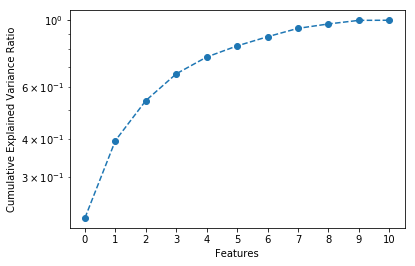

In [6]:
plt.semilogy(PCA().fit(x).explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,x.shape[1],1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

In [7]:
numeric_variables=pd.DataFrame()
for col in all_data.columns:
    if (all_data[col].value_counts().index.isin([0,1]).all()==0): #if the column is not binary
        numeric_variables[col]=all_data[col]

In [8]:
numeric_variables.head()

,NearestCompetitor,Region_AreaKM2,Region_GDP,Region_PopulationK,Mean_Dew_PointC,Mean_Humidity,Mean_Sea_Level_PressurehPa,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Precipitationmm
0,326,9643,17130,2770,-1,82,1030,1,11.0,16,0.0
1,326,9643,17130,2770,-1,73,1027,3,13.0,10,0.0
2,326,9643,17130,2770,-1,71,1024,3,11.0,10,0.0
3,326,9643,17130,2770,-4,56,1024,3,15.0,10,0.0
4,326,9643,17130,2770,-3,65,1020,4,22.0,11,0.0


Principal component analysis is affected by attribute scale so we normalize all the attributes by eliminating the mean and scaling to unit variance.

In [9]:
x = StandardScaler().fit_transform(numeric_variables)

In [10]:
n_components = 10
column_names = []
for i in range (0, n_components):
    col_name = "component {}".format(i+1);
    column_names.append(col_name)

In [11]:
pca = PCA(n_components)
new_data = pca.fit_transform(x)
pca_all_data = pd.DataFrame(data = new_data, 
                        columns = column_names)

In [12]:
print("Explained Variance")
for i in range (0, n_components):
    string = "component {} {}".format(i+1, pca.explained_variance_ratio_[i])
    print(string)
print("   Total Explained Variance %3.2f"%sum(pca.explained_variance_ratio_))

Explained Variance
component 1 0.21817446666412302
component 2 0.1776492649721888
component 3 0.14270279376995185
component 4 0.12337907022851166
component 5 0.09138927511400469
component 6 0.06745114757116234
component 7 0.06002702718890808
component 8 0.058724833260511186
component 9 0.03232569670793191
component 10 0.027329847376271543
   Total Explained Variance 1.00


In [13]:
pca_all_data.head(5)

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10
0,-1.696425,0.418611,-1.318477,-0.107461,-1.283331,0.676025,1.227548,0.754634,-0.270606,0.353577
1,-0.960090,0.205010,-1.612906,-0.265084,-1.268255,0.695481,0.234547,0.839792,0.118244,0.188564
2,-1.057649,0.220715,-1.391744,-0.196760,-1.210955,0.423096,0.147306,0.872317,0.480504,0.089777
3,-0.490254,0.212094,-2.289913,0.566630,-1.090978,0.785273,-0.205467,0.902258,0.921935,0.132657
4,-0.173302,0.189515,-2.151919,1.107226,-0.962894,0.829295,-0.701533,0.933489,-0.399216,0.396444


In [14]:
bool_cols = [col for col in all_data if all_data[col].dropna().value_counts().index.isin([0,1]).all()]
bool_indx = pd.Index(bool_cols)
bool_variables = all_data[bool_indx]

In [15]:
test_offset = train.shape[0]
PCATrain = pd.concat([pca_all_data.iloc[0:test_offset,:], bool_variables.iloc[0:test_offset,:]], axis=1)
PCATrain['NumberOfSales'] = train["NumberOfSales"]
PCATrain['NumberOfCustomers'] = train["NumberOfCustomers"]
PCATest = pd.concat([pca_all_data.iloc[test_offset:pca_all_data.shape[0],:], bool_variables.iloc[test_offset:pca_all_data.shape[0],:]], axis=1)

# Normalization

In [16]:
all_data_index = PCATrain.columns.drop(['NumberOfSales','NumberOfCustomers'])
all_data_pca = PCATrain.loc[:,all_data_index].append([PCATest.loc[:,all_data_index]])
all_data_pca = all_data_pca.reset_index(drop=True)
columns = all_data_pca.columns

In [17]:
x = all_data_pca.values
min_max_scaler = MinMaxScaler()
all_data_normalized = pd.DataFrame(min_max_scaler.fit_transform(x))
all_data_normalized.columns = columns
all_data_normalized = all_data_normalized.round(6)

In [18]:
all_data_normalized.describe()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,October,November,December,Fog,Snow,Hail,Thunderstorm,Rain,Nothing,ZeroClouds
count,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,...,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000,471544.000000
mean,0.484929,0.429897,0.421933,0.464768,0.298958,0.344937,0.418118,0.286328,0.455190,0.410010,...,0.073293,0.073843,0.071758,0.249934,0.077098,0.009299,0.059390,0.584923,0.248940,0.000238
std,0.156445,0.187567,0.124856,0.128850,0.109868,0.102416,0.092528,0.135436,0.110908,0.148776,...,0.260618,0.261515,0.258087,0.432975,0.266747,0.095983,0.236353,0.492736,0.432399,0.015410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372044,0.272727,0.347085,0.376909,0.227472,0.278998,0.358351,0.212823,0.381370,0.301763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479921,0.435286,0.415249,0.452844,0.282310,0.332093,0.417604,0.252967,0.449695,0.413226,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.594176,0.591480,0.486347,0.540945,0.342438,0.395014,0.477065,0.322182,0.524842,0.503317,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#SalesNormalized = pd.DataFrame(min_max_scaler.fit_transform(train["NumberOfSales"].values.reshape(-1, 1)))
#CustomersNormalized = pd.DataFrame(min_max_scaler.fit_transform(train["NumberOfCustomers"].values.reshape(-1, 1)))

In [20]:
test_offset = PCATrain.shape[0]
train_normalized = all_data_normalized.iloc[0:test_offset,:]
train_normalized['NumberOfSales'] = train['NumberOfSales']
train_normalized['NumberOfCustomers'] = train['NumberOfCustomers']
test_normalized = all_data_normalized.iloc[test_offset:all_data_normalized.shape[0],:]

C:\Users\utentepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\utentepc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
train_normalized.head()

,component 1,component 2,component 3,component 4,component 5,component 6,component 7,component 8,component 9,component 10,...,December,Fog,Snow,Hail,Thunderstorm,Rain,Nothing,ZeroClouds,NumberOfSales,NumberOfCustomers
0,0.313614,0.486065,0.290541,0.452883,0.158332,0.425316,0.557896,0.413492,0.404860,0.505950,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.266354,495
1,0.387973,0.457405,0.261200,0.435449,0.159984,0.427629,0.444825,0.427842,0.477183,0.461175,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.302695,608
2,0.378121,0.459512,0.283239,0.443006,0.166263,0.395243,0.434892,0.433323,0.544560,0.434370,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.304995,665
3,0.435420,0.458355,0.193733,0.527439,0.179410,0.438305,0.394722,0.438368,0.626662,0.446005,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.290064,630
4,0.467428,0.455325,0.207484,0.587230,0.193445,0.443539,0.338236,0.443631,0.380940,0.517582,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.324482,763


# Lasso Feature selection

In [22]:
X_train_complete=train_normalized
X_test=test_normalized

In [29]:
def Lasso_Selection(x,y):
    lasso = linear_model.LassoCV(cv=10)
    lasso_fit=lasso.fit(x,y)
    yp_lasso = lasso.predict(x)
    r2_simple_train = r2_score(y,yp_lasso)
    rmse_simple_train = mean_squared_error(y,yp_lasso,multioutput='raw_values')
    print("Linear Regression with Lasso")
    print("==================================================")
    print("\t                  Train R2=%.3f"%(r2_simple_train))
    print("\t                  Train RMSE=%.3f"%(rmse_simple_train))
    print("\nLinear Regression with Lasso - Chosen Features")
    selected = []
    threshold=0
    for i,c in enumerate(np.append(lasso_fit.intercept_,lasso_fit.coef_)):
        if abs(c)>threshold and not i == 0:
            selected.append(x.columns[i-1])
    print(selected)

## Predict Sales Directly

In [30]:
x=X_train_complete.drop(columns=['NumberOfCustomers','NumberOfSales'],axis=1)
y=X_train_complete['NumberOfSales']

In [31]:
Lasso_Selection(x,y)

Linear Regression with Lasso
	                  Train R2=0.226
	                  Train RMSE=0.002

Linear Regression with Lasso - Chosen Features
['component 3', 'HasPromotions', 'HyperMarket', 'ShoppingCenter', 'General', 'Region0', 'Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region8', 'Region9', 'January', 'May', 'June', 'September', 'October', 'November', 'December']


## Predict Customers

In [32]:
x=X_train_complete.drop(columns=['NumberOfCustomers','NumberOfSales'],axis=1)
y=X_train_complete['NumberOfCustomers']

In [33]:
Lasso_Selection(x,y)

Linear Regression with Lasso
	                  Train R2=0.321
	                  Train RMSE=16980.593

Linear Regression with Lasso - Chosen Features
['component 3', 'component 4', 'component 5', 'component 6', 'HasPromotions', 'StandardMarket', 'HyperMarket', 'SuperMarket', 'ShoppingCenter', 'General', 'WithFishDepartment', 'Region0', 'Region1', 'Region2', 'Region3', 'Region4', 'Region5', 'Region6', 'Region7', 'Region8', 'Region9', 'January', 'February', 'March', 'April', 'May', 'June', 'September', 'October', 'November', 'December', 'Fog', 'Snow', 'Nothing']


## Predict Sales given Customers

In [34]:
x=X_train_complete.drop(columns=['NumberOfSales'],axis=1)
y=X_train_complete['NumberOfSales']

In [35]:
Lasso_Selection(x,y)

Linear Regression with Lasso
	                  Train R2=0.519
	                  Train RMSE=0.001

Linear Regression with Lasso - Chosen Features
['HasPromotions', 'NumberOfCustomers']


# Super Clean Dataset Creation
Given pca and lasso we decided to leave just the seleted features in order to train faster our models

In [ ]:
all_data_final = pd.concat((train_normalized.loc[:,all_data_index],test_normalized.loc[:,all_data_index]), ignore_index=True)

In [ ]:
all_data_final = all_data_final[x.columns]

In [ ]:
test_offset = train_normalized.shape[0]
finalTrain = all_data_final.iloc[0:test_offset,:]
finalTrain['NumberOfCustomers'] = train["NumberOfCustomers"]
finalTrain['NumberOfSales'] = train["NumberOfSales"]
finalTest = all_data_final.iloc[test_offset:pca_all_data.shape[0],:]

In [ ]:
finalTrain.to_csv("FinalPCATrain.csv")
finalTest.to_csv("FinalPCATest.csv")